In [4]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Concept of Customer Churn

The customer churn is when a customer stops using a company's products or services and ending their relationship with business.Today’s competitive conditions have led to numerous companies selling the same product at quite similar service and product quality. The Churn Analysis aims to predict customers who are going to stop using a product or service among the customers. The customer churn analysis is a data mining-based work that will extract these possibilities. Customer churn, defined as the frequency at which customers cease utilizing a company’s services, poses a notable challenge within the  industry. It not only results in revenue loss but also affects customer satisfaction and loyalty. Since the cost of retaining existing customers is usually lower than acquiring new ones, firms must predict customers canceling their services before it happens, also known as churn analysis and prediction.

 2. Goal of the project

The main goal of the project is to analyze customer behavior and identify the main factor why and which type of customer are leaving the business or service. By deeply studying the data, my aim to discover patterns asnd trends that help us to understand which type of customer are more likely to churn and what kind of factors influence them to leave the service. This project is focused on data analysis using charts and  basic stastistics to find meaningful insights which help the business to create better strategies to improve customer retention.

In [5]:
df1 = pd.read_csv("Churn Dataset.csv") # import first data

In [6]:
df2 = pd.read_csv("customer_churn_data.csv") # import second data

In [7]:
df1.head() #Ffirst 5 rows of the data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df1.shape # Checking shape of first data

(7043, 21)

In [9]:
df2.head() # first five rows of second data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [10]:
df2.shape # Checking shape of second data

(5880, 21)

In [11]:
import sqlite3

In [12]:
conn = sqlite3.connect(':memory:')

In [13]:
df1.to_sql("first_data", conn, index=False, if_exists="replace")
df2.to_sql("second_data", conn, index=False, if_exists="replace")


5880

In [14]:
query = """
SELECT * FROM first_data
UNION ALL
SELECT * FROM second_data
"""

df3 = pd.read_sql_query(query, conn)


In [15]:
df3

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12918,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
12919,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
12920,CUST5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
12921,CUST5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


In [16]:
# df3 = pd.concat([df1,df2], axis=0) # combining two data

In [17]:
df3 # First five rows of combined data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12918,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
12919,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
12920,CUST5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
12921,CUST5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


In [18]:
df3.shape # Shape of combined data

(12923, 21)

In [12]:
df3.describe() #overview of data

,SeniorCitizen,tenure,MonthlyCharges
count,12923.000000,12923.000000,12923.000000
mean,0.316180,34.272150,67.216926
std,0.465002,23.063998,29.633074
min,0.000000,0.000000,18.250000
25%,0.000000,13.000000,43.300000
50%,0.000000,33.000000,70.300000
75%,1.000000,55.000000,91.810000
max,1.000000,72.000000,119.990000


In [13]:
df3.isna().sum() # checking null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df3.dtypes # Checking data types

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df3['TotalCharges'] =df3["TotalCharges"].str.replace(" ","") # changing total charge 
df3["TotalCharges"] =pd.to_numeric(df3["TotalCharges"])

In [16]:
df3.dtypes  #checking data types

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
df3.duplicated().sum()  # checking duplicated values

0

In [18]:
df3.columns.to_list()  #columns name printed in list

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

Summary Statistics Of Numerical columns

In [19]:
df3.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,12923.000000,12923.000000,12923.000000,7032.000000
mean,0.316180,34.272150,67.216926,2283.300441
std,0.465002,23.063998,29.633074,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,13.000000,43.300000,401.450000
50%,0.000000,33.000000,70.300000,1397.475000
75%,1.000000,55.000000,91.810000,3794.737500
max,1.000000,72.000000,119.990000,8684.800000


1. SeniorCitizen

Mean: 0.3162 indicates that, on average, about 31.62% of the customers are senior citizens.\
Min and Max: Values range from 0 to 1, confirming it is a binary variable (0 = Not a senior citizen, 1 = Senior citizen).\
25th Percentile and 75th Percentile: The equal distribution between 0 and 1 at these percentiles reinforces that the dataset has an even split of senior and non-senior customers.\

2. Tenure

Mean: The average customer has stayed with the company for approximately 34.27 months. i.e. less than 3 years.
Min: 0 month indicates some customers are new to the company.\
Max: 72 months (~6 years) shows the longest tenure.\
25th and 75th Percentiles: 25% of customers have a tenure of less than 13 months, while 75% have stayed longer than 55 months.\
__Insight__: A significant portion of customers have relatively short tenure (<13 months), potentially indicating a higher churn risk among new customers.

3. MonthlyCharges

Mean: The average monthly charge is dollars 67.22.
Min and Max: Monthly charges range from dollars 18.25 to 119.99.
25th and 75th Percentiles: 25% of customers pay less than dollars 43.30, and 75% pay more than dollars 91.81.
__Insight__: The wide range of monthly charges may indicate the availability of diverse service plans. Customers in the higher charge brackets could have more premium services, which might impact churn differently.

4. TotalCharges

Mean: The average total charge is dollars 2283.30.\
Min and Max: Total charges range from dollars 18.80 to 8684.80.\
25th and 75th Percentiles: 25% of customers have total charges below dollars 401.45, while 75% of customers have paid over dollars 3794.74.\
__Insight__: Total charges reflect tenure and monthly charges. Customers with higher total charges are likely long-term customers. However, those with low total charges may be newer or at risk of churn due to lack of commitment.

__Churn Risk Among New Customers: Customers with short tenure and low total charges may require targeted retention strategies.__

__Distribution of churn and retained customer__

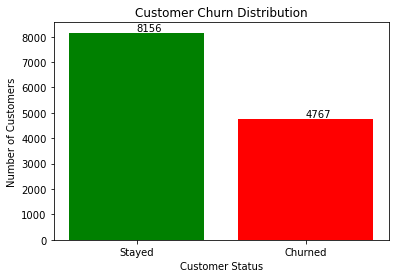

In [20]:
churn_counts = df3['Churn'].value_counts().sort_index()

#for  Bar plot
labels = ['Stayed', 'Churned']
colors = ['green', 'red']

plt.bar(labels, churn_counts, color=colors)
plt.title('Customer Churn Distribution')
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')

# To show exact numbers on bars
for i, count in enumerate(churn_counts):
    plt.text(i,count , str(count), va='bottom')

plt.show()

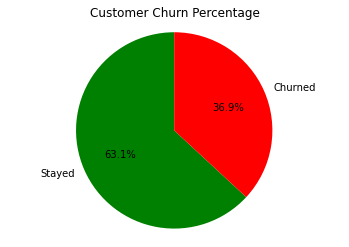

In [23]:
churn_counts = df3['Churn'].value_counts().sort_index()
total_counts = churn_counts.sum()  # Calculate percentages
percentages = (churn_counts / total_counts) * 100
labels = ['Stayed', 'Churned']

# Pie chart
colors = ['green', 'red']
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn Percentage')
plt.axis('equal')
plt.show()

Data is shows, with Non churners ratio = 63.1% and churners ratio = 36.9%.\
Total number of Non churners are 8156.\
Total number of churners are 4767.\
But we will analyse the data with other features while taking the target values separately to get some insights.
from above information shows that more then 1/3rd of the customer are churned.

__Now separate columns into different group as customer information, Service sign up for and payment information related to target variable.__

In [24]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

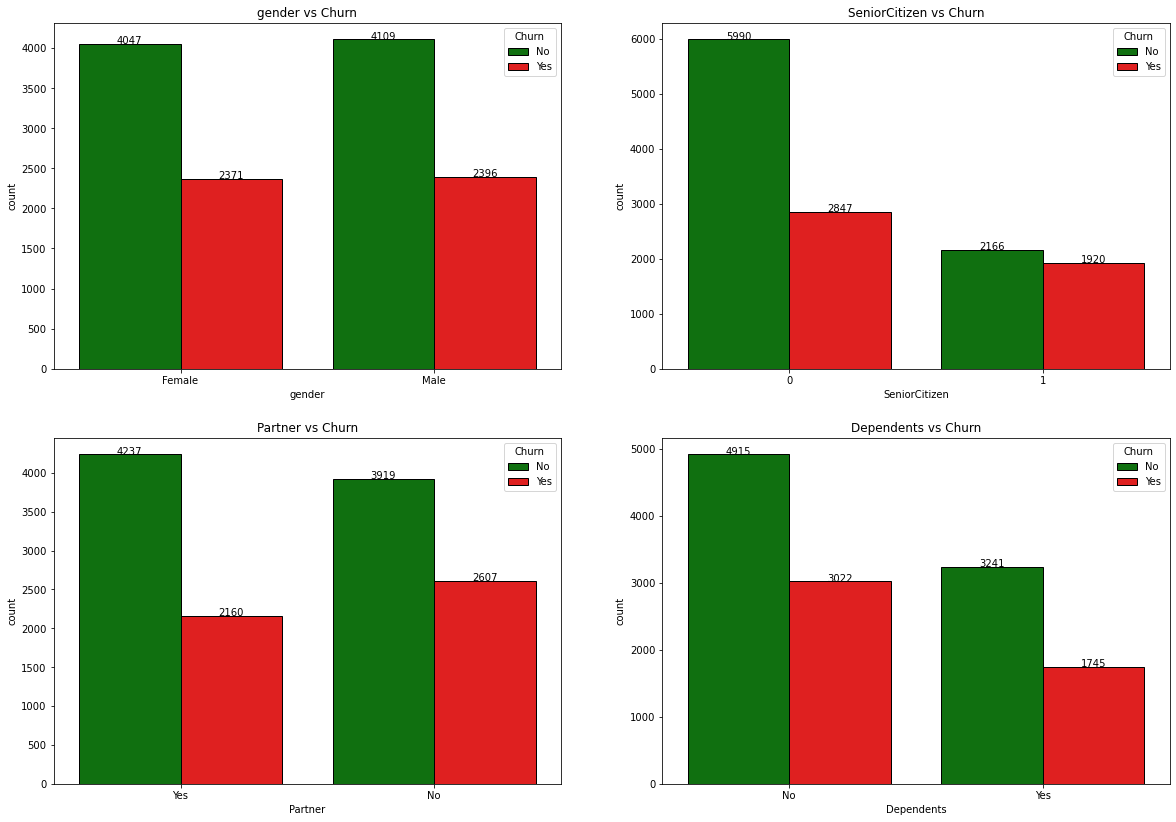

In [26]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=l1[i],data = df3,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center',fontsize=10)
    title = l1[i] + ' vs Churn'
    plt.title(title);
plt.tight_layout
plt.show()

Customer churning for male & female customers is very similar to each other!\
Similarly, number of SeniorCitizen customers is pretty low! Out of that, we can observe a near about 40% churn \of SeniorCitizen customers. It accounts for a total of 476 customers out of 1142 Senior Citizen customers.
Customers who are housing with a Partner churned less as compared to those not living with a Partner.\
Similary, churning is high for the customers that don't have Dependents with them!

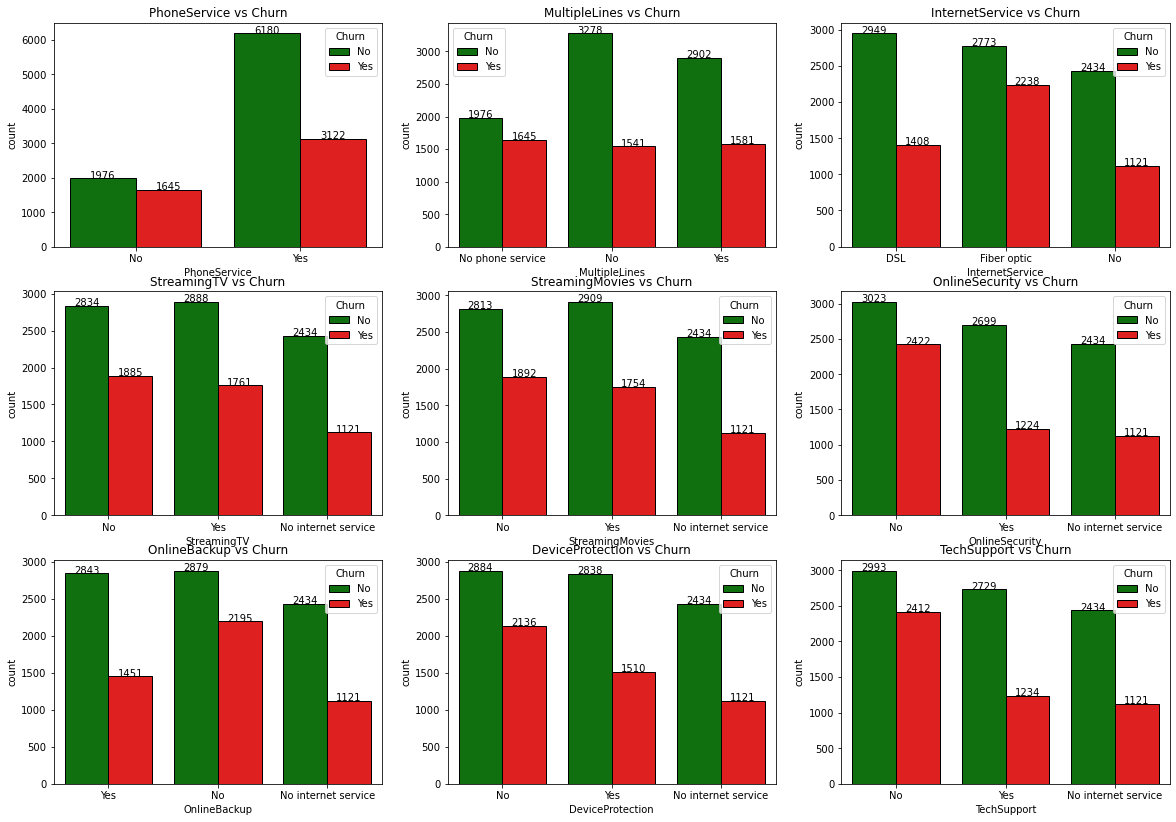

In [27]:
fig = plt.subplots(nrows = 3,ncols = 3,figsize = (20,14))
for i in range(len(l2)):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(x=l2[i],data = df3,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center',fontsize=10)
    title = l2[i] + ' vs Churn'
    plt.title(title);
plt.tight_layout
plt.show()

For PhoneService, despite having no phone service, more customers were churned as compared to the number of customers who dropped the services.\
In case of MultipleLines, churn rate in when the Multiplelines are present or not is the same.\
A high number of customers have displayed their resistance towards the use of Fiber optic cables for providing the InternetService. On the contrary, from the above graph, customers prefer using DSL for their InternetService!
StreamingTV and StreamingMovies display an identical graph. Irrespective of being subscribed to StreamingTV & StreamingMovies, a lot of customers have been churned. Looks like the streaming content was not entirely at fault.\

When it comes down to catering the customers, services w.r.t OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport are crucial from the above visualizations!\
A high number of customers have switched their service provider when it comes down poor services with the above mentioned features.

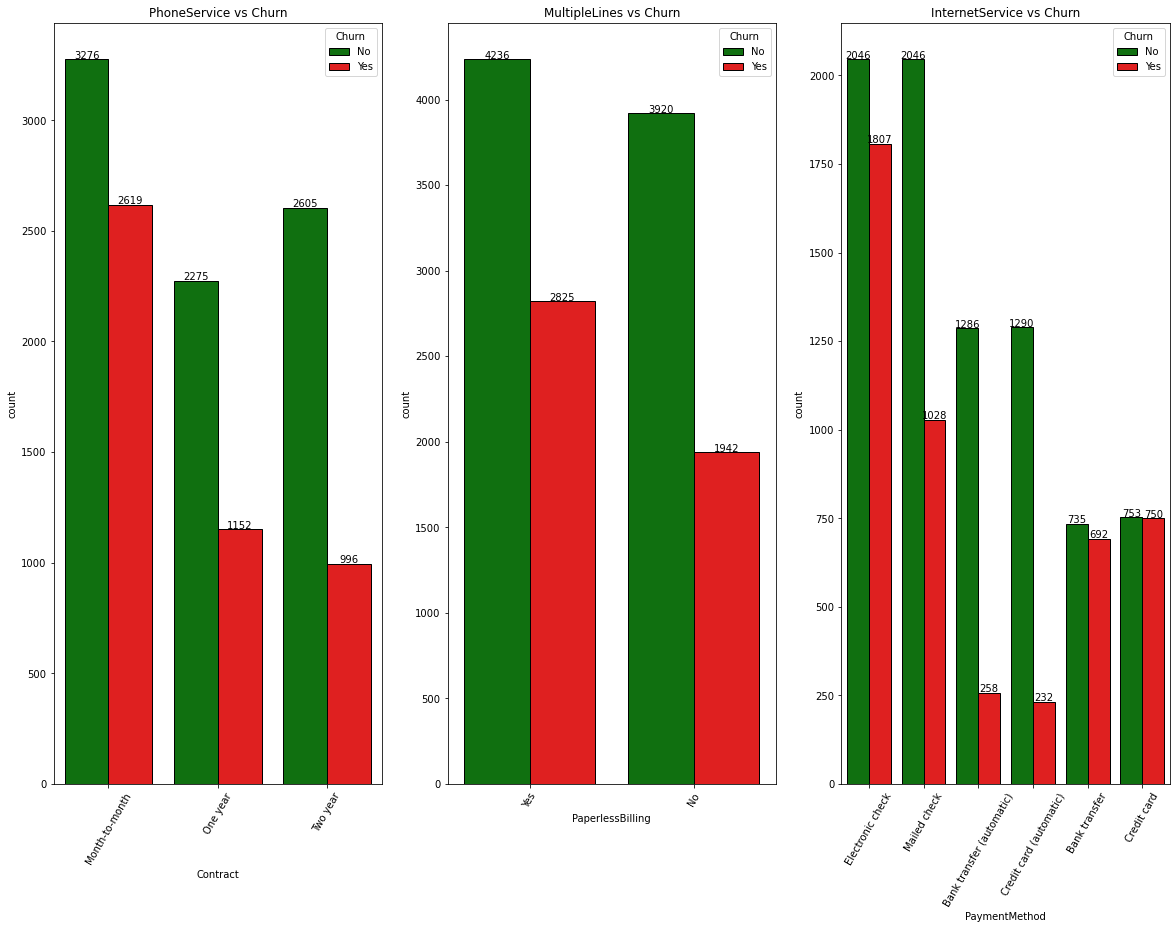

In [29]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (20,14))
for i in range(len(l3)):
    plt.subplot(1,3,i+1)
    ax = sns.countplot(x=l3[i],data = df3,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center',fontsize=10)
    title = l2[i] + ' vs Churn'
    plt.title(title);
    plt.xticks(rotation=60)
plt.tight_layout
plt.show()

Customer churning for a Month-to-Month based Contract is quite high. This is probably because the customers are testing out the varied services available to them and hence, in order to save money, 1 month service is tested out!\
Another reason can be the overall experience with the internet service, streaming service and phone service were not consistent. Every customer has a different priority and hence if one of the 3 was upto par, the entire service was cutoff!
PaperlessBilling displays a high number of customers being churned out. This is probably because of some payment issue or receipt issues.\
Customers clearly resented the Electronic check PaymentMethod. Out of the 3853 number of bills paid using Electronic check, a staggering 1807 customers exited the pool of service due to this payment method. Company definitely needs to either drop Electronic check method or make it hassle-free and user-friendly.


We will now point our attention directly towards to the churn customers!\
Group 1 : Customer Information :\
gender,SeniorCitizen, Partner, Dependents 


In [30]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"


In [31]:
df3['Tenure Cohort'] = df3['tenure'].apply(cohort)

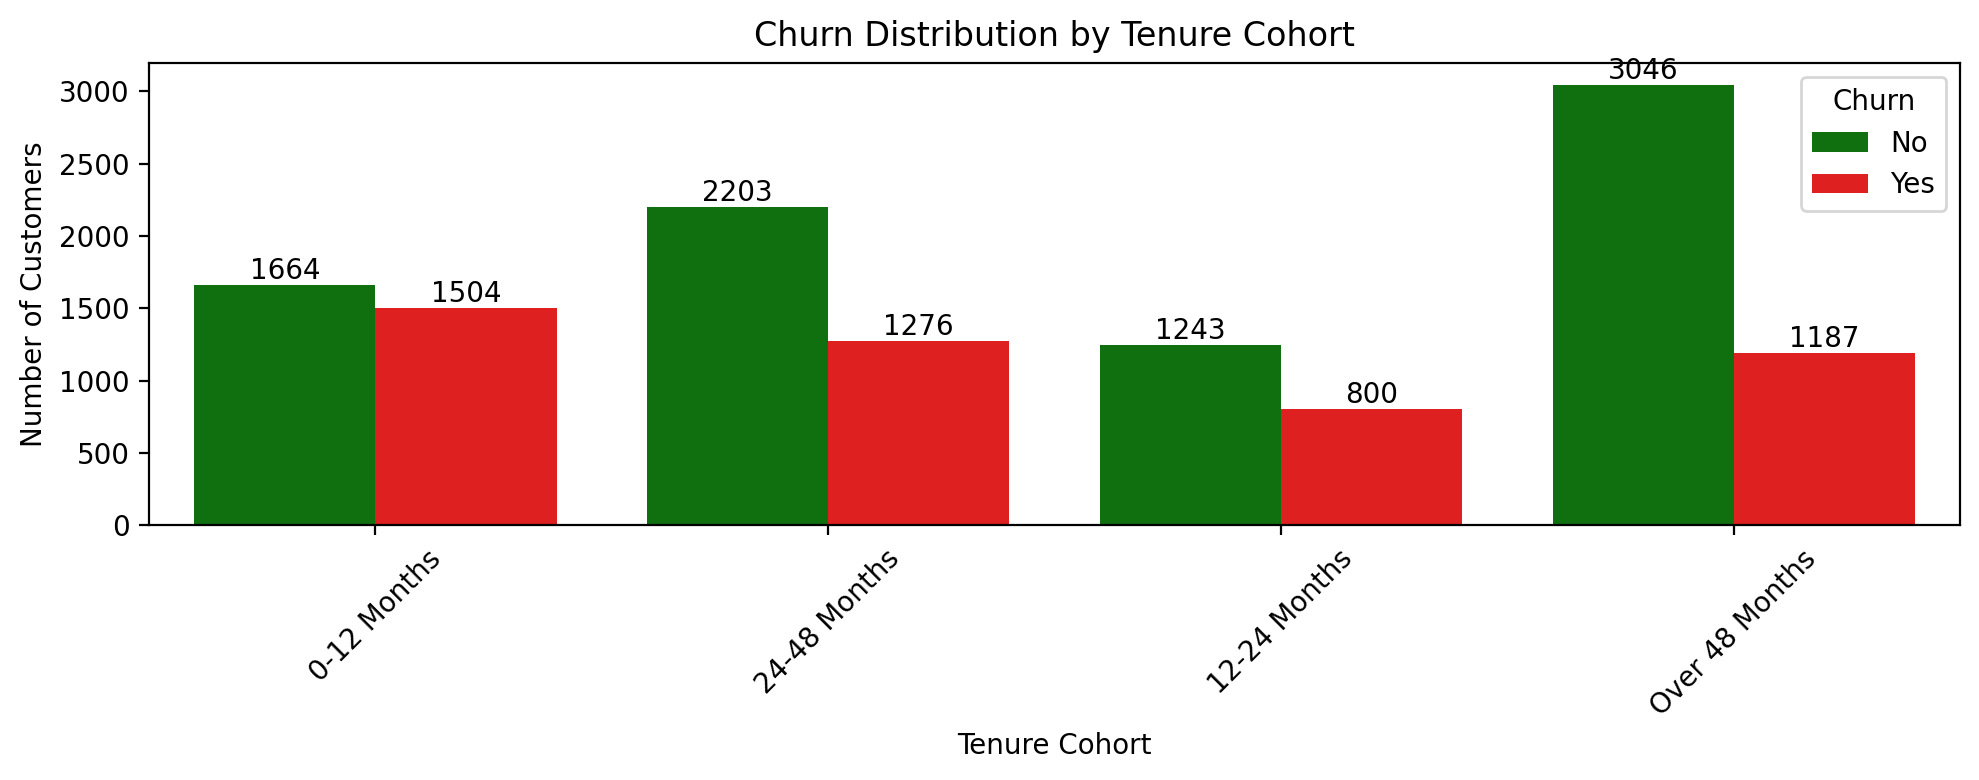

In [32]:
palette = {'No': 'green', 'Yes': 'red'}

plt.figure(figsize=(10, 4), dpi=200)
ax = sns.countplot(data=df3, x='Tenure Cohort', hue='Churn', palette=palette)

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Churn Distribution by Tenure Cohort")
plt.xlabel("Tenure Cohort")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Considering tenure, a high number of customers have left before the 1st year. This high cancellation of services continues for 0-12 months but the churn customers have reduced from 12-24  month. From the above graph it shows that over 48 months customer are less churned. As the tenure increased customer stayed more time.

__Now discuss about gender, Seniorcitizen, partner and dependents__

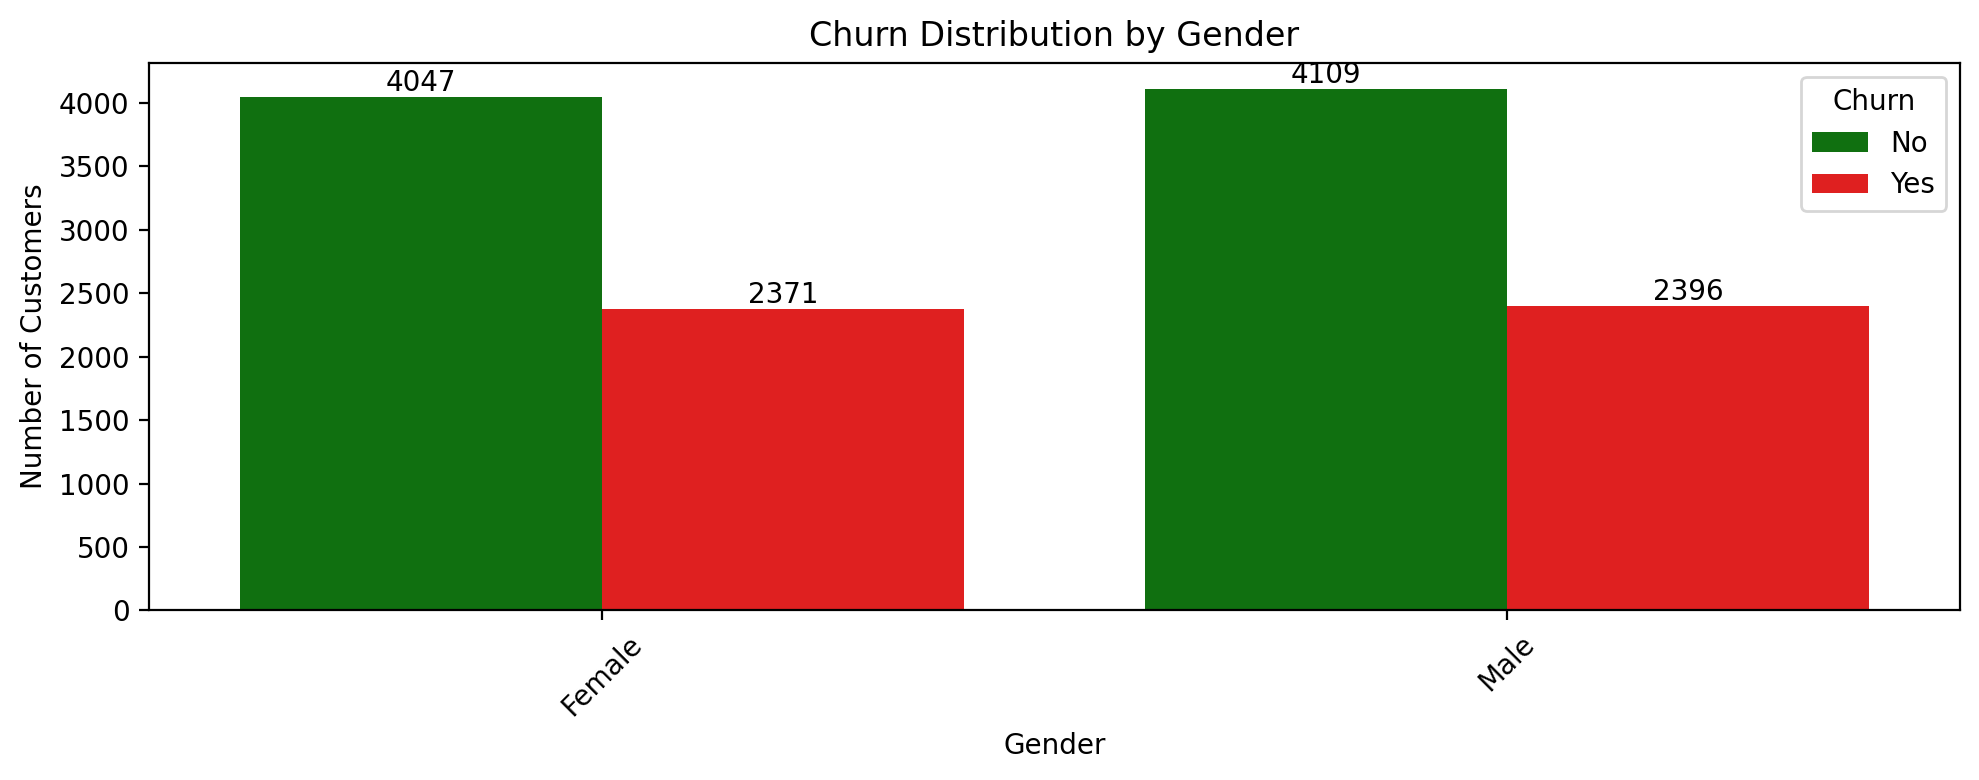

In [33]:
palette = {'No': 'green', 'Yes': 'red'}
i=["gender",'SeniorCitizen',"partner",'Dependents']
plt.figure(figsize=(10, 4), dpi=200)
ax = sns.countplot(data=df3, x='gender', hue='Churn', palette=palette)

# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can observe a clear cut almost 50% - 50% split between the male and female customers that have switched their services. Hence, the reason for switching is something related to the service or some process which the customers reacted badly!

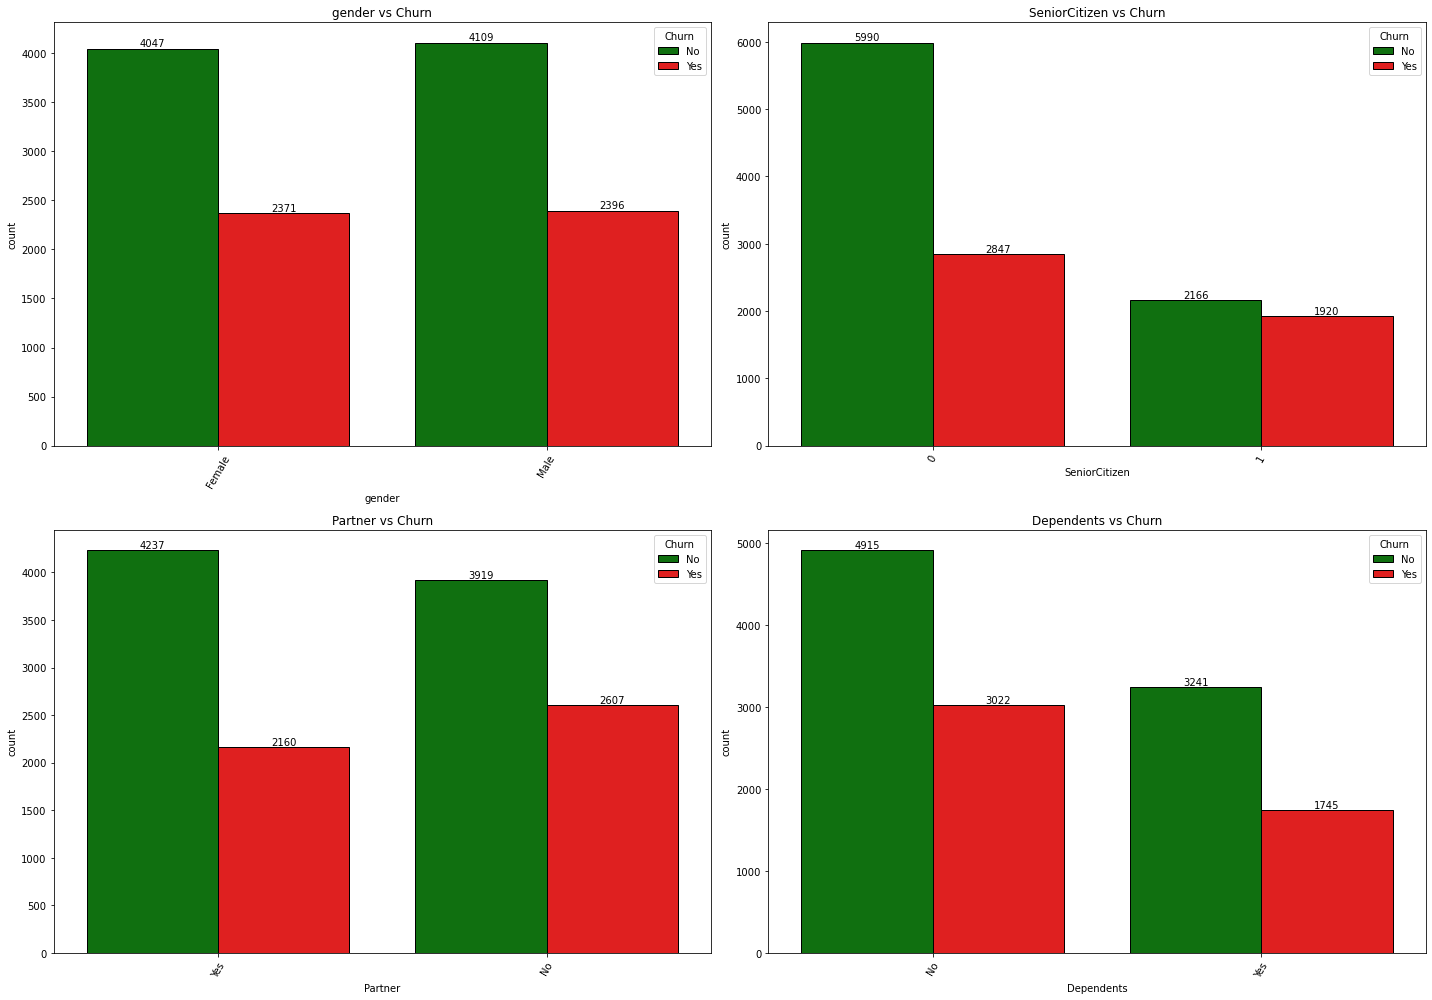

In [35]:
palette = {'No': 'green', 'Yes': 'red'}
l4=["gender",'SeniorCitizen',"Partner",'Dependents']
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l4)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=l4[i],data = df3,hue = "Churn",palette = palette,edgecolor = 'black')
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
        title = l4[i] + ' vs Churn'
    plt.title(title);
    plt.xticks(rotation=60)
    
plt.tight_layout()
plt.show()

Most  of the churned customers are not SeniorCitizen! This is a major info that the company needs to divert it's attention towards!


Customers living by themselves have cutoff the services. From Partners & Dependents data, more than 50% of customers churned out were living by themselves.

__Now analyse about payment types with churn__

In [36]:
contract = df3[df3['Churn'] == "Yes"]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = df3[df3['Churn'] == "Yes"]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes 

paymentmethod = df3[df3['Churn'] == "Yes"]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, 
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100] 

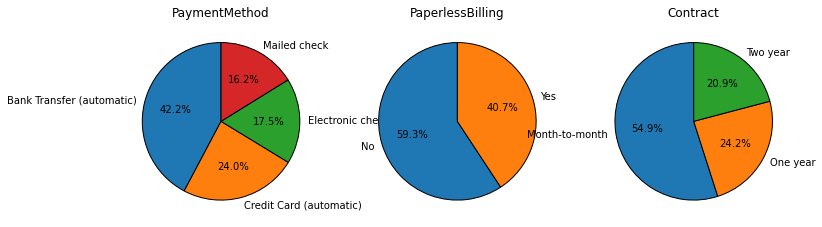

In [37]:
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,12))
plt.subplot(1,3,1)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');
plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');


plt.subplot(1,3,3)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');




Month-to-Month Contract duration has the dominating share when it comes churning with a massive 54.9% customers!\
PaperlessBilling slightly accepted  by the customers.\
 Bank transfer definitely needs to be sorted as it accounts for 42.2% of churn. It is then followed by Credit card(autometic)  Electronic check & Mailed check!. It is Surprizing tesult why atomatic payment customer are churn.\
 It shows that atomatic payment customer including credit card and Bank transfer are 66.2% are churned, which shows that due failure of good service customers are churned.

KEY FINDINGS BASED ON THE DATA EXPLORED

__KEY FINDINGS BASED ON THE DATA EXPLORED__
1. The overall churn rate is approximately 36.9%
2. We can observe a clear cut almost 50% - 50% split between the male and female customers that have switched their services
3. This indicates that roughly 100 in 37 customers are leaving the company.
4. Customers with shorter tenure (i.e. newer customers) are significantly more likely to churn.
5. Churn rate is highest in the first few months of joining and decreasing after time.
6. Month-to-month contract customers have the highest churn rate i.e 54.9%.
7. PaperlessBilling slightly accepted  by the customers.
8. It shows that atomatic payment customer including credit card and Bank transfer are 66.2% are churned, which shows that due failure of good service customers are churned. Or difficulties in autopay on the system or Surprise charges or unclear billing.
9. Customers who did not have phone service showed a higher churn rate compared to those who stayed, indicating that the absence of phone service may be a factor in customer attrition.
10. Many customers who use Fiber Optic internet have churned (left the company), meaning they were not happy or did not prefer it.
11. In contrast, more customers who use DSL internet have stayed, showing that they prefer DSL over fiber optic.

